In [1]:
import pandas as pd
import numpy as np

import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
import math 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
#nltk.download('vader_lexicon')
#nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from textblob import TextBlob

In [ ]:
#text pre-processing :
# useful resources : https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
#!pip install UNICODE_EMO

In [2]:
df=pd.read_csv("SA0929.csv")

In [3]:
df.describe()

,score,comms_num,created,view_num
count,983.000000,983.000000,9.830000e+02,0.0
mean,390.844354,15.506612,1.569406e+09,NaN
std,1663.255310,41.592408,2.007035e+05,NaN
min,0.000000,0.000000,1.569072e+09,NaN
25%,20.000000,2.000000,1.569228e+09,NaN
50%,56.000000,5.000000,1.569417e+09,NaN
75%,182.500000,14.000000,1.569570e+09,NaN
max,30375.000000,563.000000,1.569751e+09,NaN


In [30]:
#df = df.sample(n=2000)

In [6]:
#Convert Emoji:
def convert_emojis(text):
    for emot in UNICODE_EMO:
        if emot in text:
            emo_word = "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split())
            text = text.replace(emot,emo_word)
    return text

def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

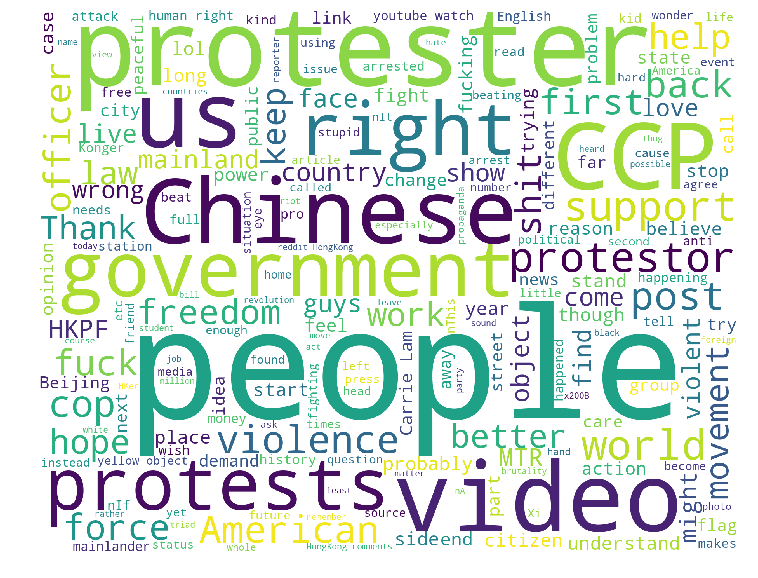

In [6]:
#-----------------------word cloud analysis------------------------------------
text = ""
for index, row in df.iterrows():
    comments = row['comment']
    try :
        if len(comments) != 0 :
            for i in comments: 
                text = text + i
    except: 
        pass
#my_stop_words = ["around","took","says","less","person","best","fact","talk","https","word","means","context","talk","big","bit","coming","two","hong","without","others","happend","dont","please","everything","always","talking","nothing","thought","done","gonne","another","maybe","exactly","man","seen","point","give","yes","real","seems","used","getting","came","looks","may","great","either","already","pretty","happens","ones","put","must","know","nthe","well","yeah","made","happen","every","got","tring","good","let","bad","anything","ni","lot","many","things","someone","nI","actually","guy","sure","china","kong","protest","police","HK","hk", "hong kong","day","no","new","say","no","way","something","take","look","much","saying","never","see","said","think","need","mean","go","time","make","seem","thing","want","use","still","really","going","even","everyone","anyone","one","you","use"]
            
def get_word_cloud(text): 
    
#tokeniztion 
    tokenizer = RegexpTokenizer(r'\w+')
    text_words = tokenizer.tokenize(text)
#remove stop words 
    stop_words = stopwords.words('english')
#append stop words as we like 
    for i in my_stop_words:
        stop_words.append(i)
    
    words_filtered = []
    
    for i in text_words:
        if i.lower() not in stop_words:
            words_filtered.append(i)

spelling correction :
    words_corrected = []
    for w in words_filtered:
        blob = TextBlob(w)
        corrected = blob.correct()
        words_corrected.append(corrected)
        
#stemmer 
    porter_stemmer = PorterStemmer()
    
    words_stemmed = []
    for w in words_filtered:
        words_stemmed.append(porter_stemmer.stem(w))
    
   # words_joined = " ".join([w for w in words_stemmed])
    words_joined = " ".join([w for w in words_filtered])

# Create a word cloud
    my_wordcloud = WordCloud(background_color='white',
                         width=1800,
                         height=1400).generate(words_joined)
    
    plt.figure( figsize=(20,10) )
    plt.imshow(my_wordcloud)
    plt.axis('off')
    plt.savefig('word_cloud_0929.png')
    plt.show()
    
get_word_cloud(text)

In [ ]:
def generate_word_cloud(all_words,file_name='',bigram=True):
    mask = np.array(Image.open("hkmap.png"))
    
    font_path = os.path.join('word-cloud-font-library/','RuiZiYun.TTF')
#     'HuaWenXinWei.ttf' 
#     'chinese.simfang.ttf'

    wordcloud = WordCloud(collocations=bigram, font_path=font_path,width=2000,height=1000,
                          background_color='white',mask=mask,max_words=1000)
    wordcloud.generate(all_words)
    
    figure = plt.figure(figsize=(10,8))
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    if file_name != '':
        save_path = file_name
        plt.savefig(save_path,dpi=500)
    plt.show()